GitHub Link -  https://github.com/shriram7755/EDA_ON_HOTEL_BOOKING

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


 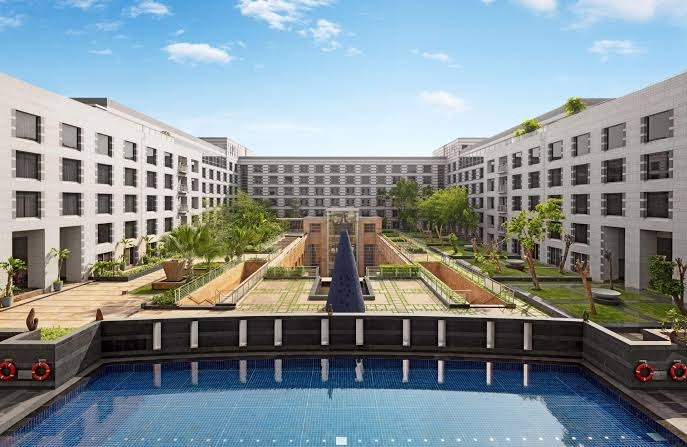

In [ ]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [ ]:
#Mounting the drive so that we can access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data file from drive
Hotel_booking_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Data_Dir/Hotel Bookings.csv')

In [ ]:
#let us check the data
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#First 10 rows
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
#last 10 rows
Hotel_booking_df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
Hotel_booking_df.shape   # shape of the data(1,19,390-Rows and 32-columns)

(119390, 32)

In [ ]:
Hotel_booking_df.columns                # list of columns present in the data

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
Hotel_booking_df.info()     # overview of data with column values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
Hotel_df = Hotel_booking_df.copy() #Creating a copy of original data with the required columns and it helps in maintaining the original dataframe.

# Renaming the 'adr' column name to 'Average_daily_rate' for understanding the data well.

In [ ]:
Hotel_df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)

In [ ]:
Hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
Hotel_df.describe() #This function  gives numerical information information

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
Hotel_df.isna().sum().sort_values(ascending =False)[:6] # gives the count of null values in first 6 column

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

# As we saw there are null values in columns(agent, children,company,country). we are replacing missing values.

In [ ]:
#Replacing null values
Hotel_df['children'].fillna(Hotel_df.children.mean(), inplace = True) # filling null values with the mean of children column
Hotel_df['children'] = Hotel_df['children'].astype(int)    #converting the data type of children column to int
Hotel_df['company'].fillna(0 , inplace = True)             # filling null values with 0 for company column
Hotel_df['company'].astype(int)                            #converting the data type of company column to int
Hotel_df['agent'].fillna(0 , inplace = True)               # filling null values with 0 for agent column
Hotel_df['agent'].astype(int)                               #converting the data type of agent column to int
Hotel_df['country'].fillna('Other',inplace = True)

# Removing duplicated rows

In [ ]:
Hotel_df[Hotel_df.duplicated()].shape #There are 31994 Duplicate rows

(31994, 32)

In [ ]:
Hotel_df.drop_duplicates(inplace = True)

# Now as we can see we dont have any null values in the data .

In [ ]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
Hotel_df[Hotel_df.adults + Hotel_df.babies + Hotel_df.children == 0].shape

(166, 32)

In [ ]:
Hotel_df.drop(Hotel_df[Hotel_df.adults + Hotel_df.babies + Hotel_df.children == 0].index, inplace = True)  #Removing rows where total is 0.

In [ ]:
Hotel_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Removing outliers and adding some columns

Adding a column

In [ ]:
Hotel_df['kids'] = Hotel_df.children + Hotel_df.babies           #creating new columns...........
Hotel_df['Full_stay'] = Hotel_df.stays_in_weekend_nights + Hotel_df.stays_in_week_nights

Removing an outlier from Average_daily_rate column

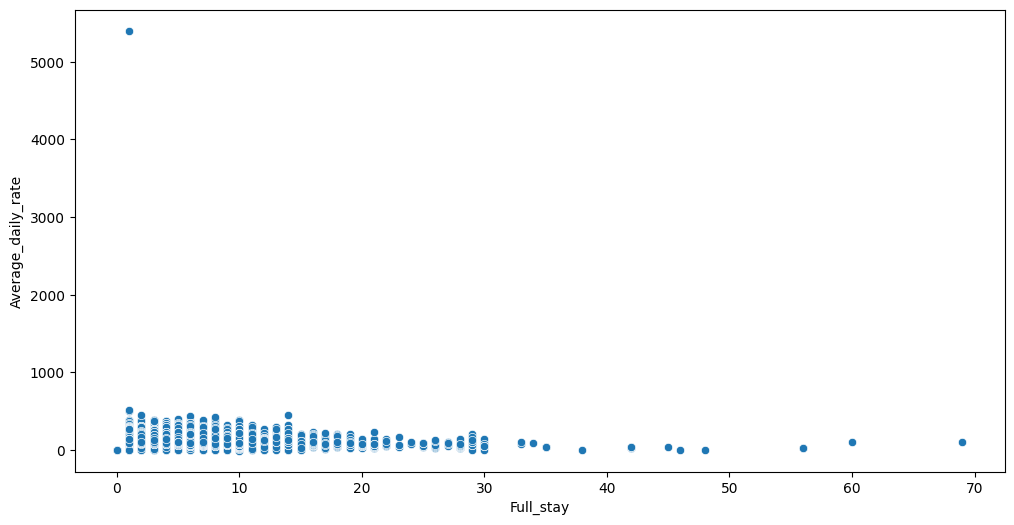

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()

In [ ]:
Hotel_df.drop(Hotel_df[Hotel_df['Average_daily_rate'] > 5000].index, inplace = True) # Removing all values > 5000

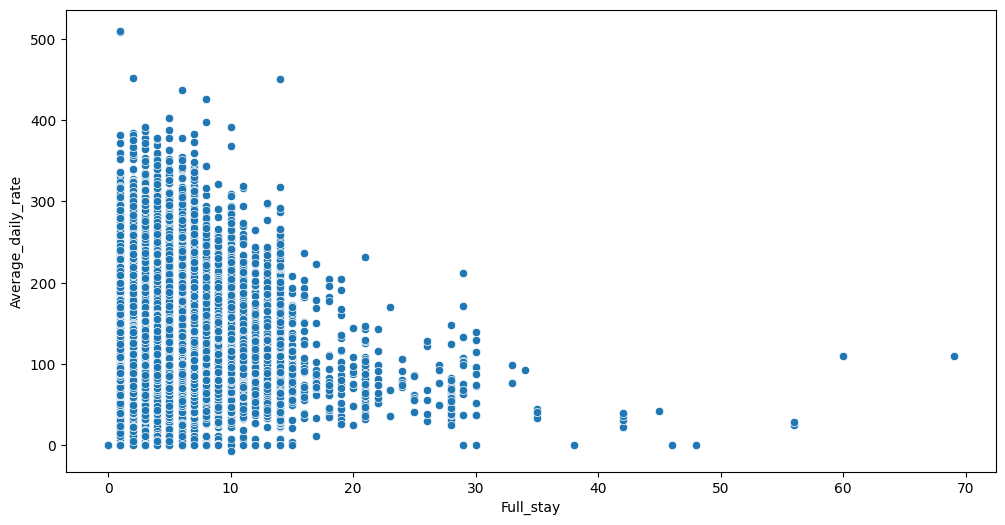

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()


From the scatter plot we can see that as length of Full_stay increases the Average_daily_rate decreases. This means for longer stay, the better deal(discounts) for customer can be finalised.

REmoving outliers from 'stays_in weekend_nights' and 'stays_in_week_nights

In [ ]:
Hotel_df.loc[Hotel_df.stays_in_weekend_nights >= 5,'stays_in_weekend_nights']=  5  #greater than 5 stays are assigned to 5 stays
Hotel_df.loc[Hotel_df.stays_in_week_nights >= 10,'stays_in_week_nights']= 10  #greater than 5 stays are assigned to 5 stays

adding new column

In [ ]:
Hotel_df['Total_members'] = Hotel_df.adults + Hotel_df.children + Hotel_df.babies
Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20  #Removing outliers


In [ ]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87229 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87229 non-null  object 
 1   is_canceled                     87229 non-null  int64  
 2   lead_time                       87229 non-null  int64  
 3   arrival_date_year               87229 non-null  int64  
 4   arrival_date_month              87229 non-null  object 
 5   arrival_date_week_number        87229 non-null  int64  
 6   arrival_date_day_of_month       87229 non-null  int64  
 7   stays_in_weekend_nights         87229 non-null  int64  
 8   stays_in_week_nights            87229 non-null  int64  
 9   adults                          87229 non-null  int64  
 10  children                        87229 non-null  int64  
 11  babies                          87229 non-null  int64  
 12  meal                           

Creating subset dataframes for 'City' and 'Resort' hotel data

In [ ]:
City_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='Resort Hotel'])

Lets first find the correlation between the numerical data.
Also, we have added Full_stay and Total_members columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
Corr_df = Hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','Average_daily_rate','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

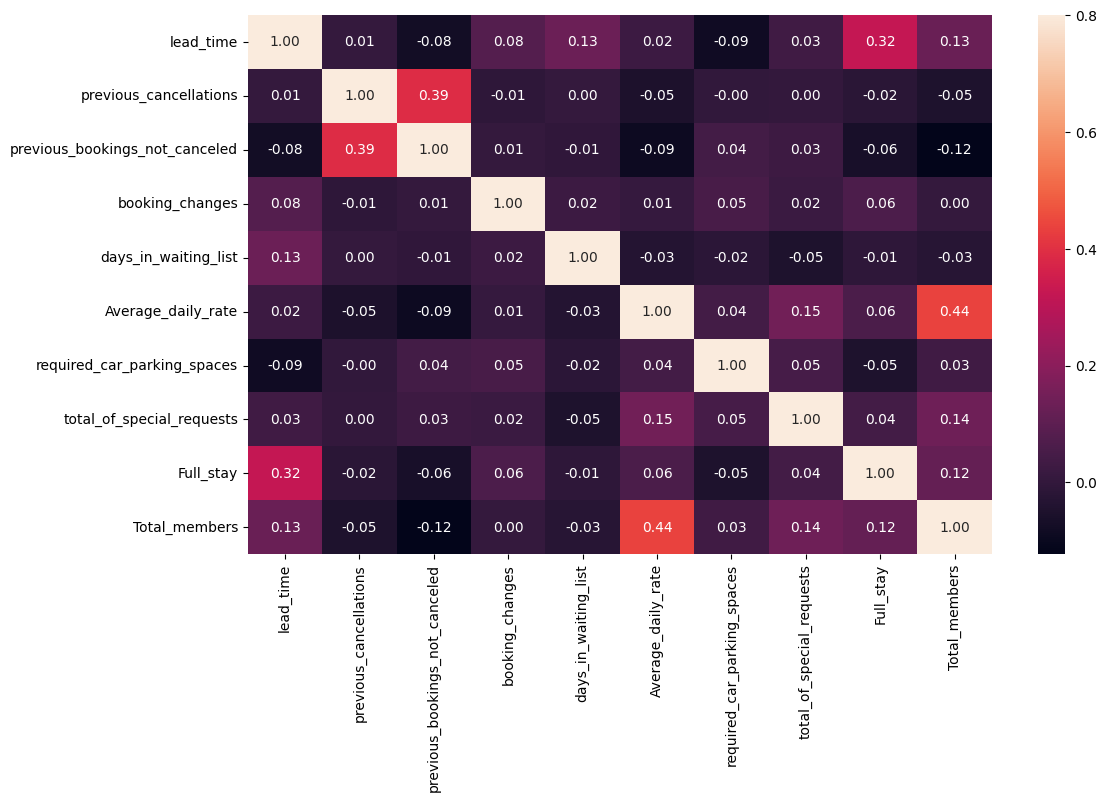

In [ ]:
corr_mat = Corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,vmax=0.8,annot = True,fmt='.2f');

1-->Full_stay length and lead_time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival date.

2--> Average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.

#  EDA

There are two types of hotels in the data 'City' and 'Resort'.

In [ ]:
Hotel_typ =Hotel_df['hotel'].value_counts()
Hotel_typ

City Hotel      53273
Resort Hotel    33956
Name: hotel, dtype: int64

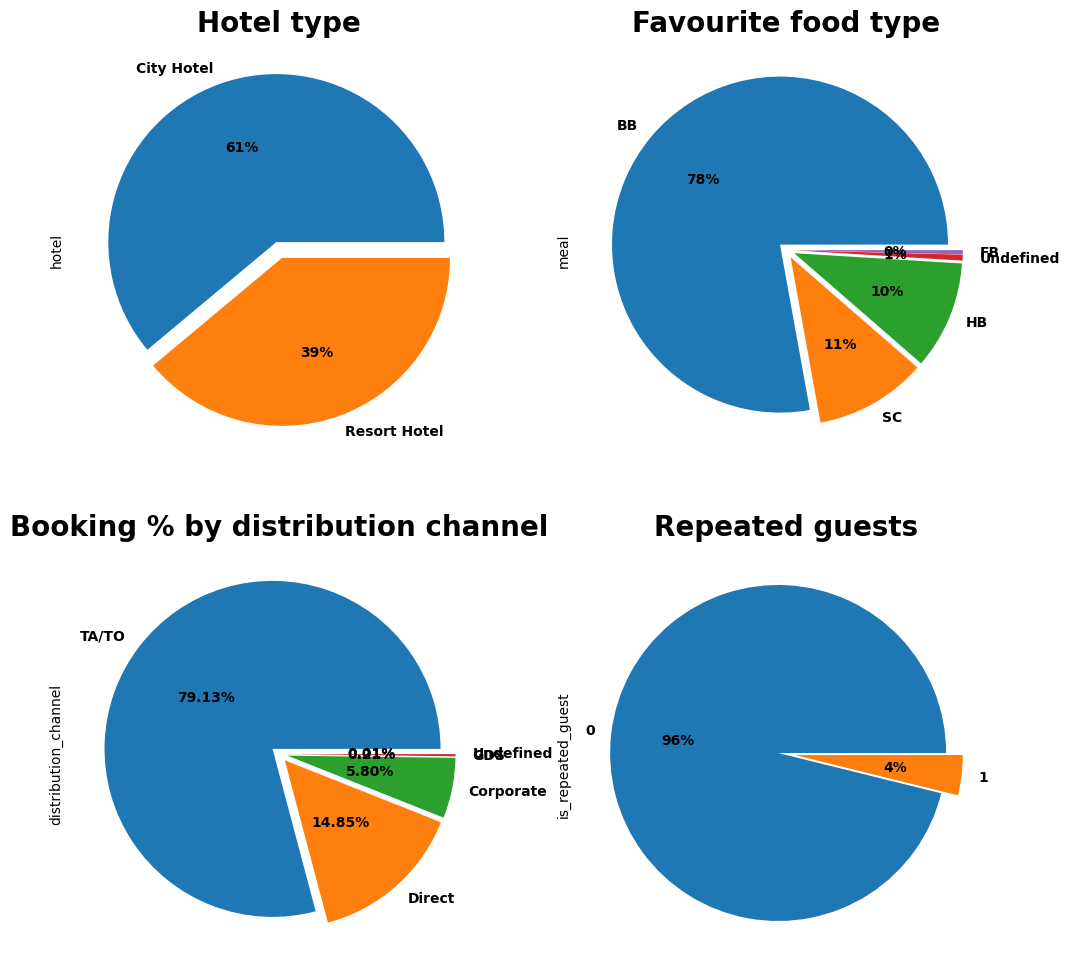

In [ ]:
plt.subplot(2,2,1 )
Hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(12,12),explode =[0.05]*2)
plt.title('Hotel type',fontweight="bold", size=20)

#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,2 )
meal_typ =Hotel_df['meal'].value_counts()
meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*5)
plt.title('Favourite food type',fontweight="bold", size=20)
#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,3 )
booking_distibution_typ =Hotel_df['distribution_channel'].value_counts()
booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'}, pctdistance=0.5,explode = [0.05]*5)
plt.title('Booking % by distribution channel', fontweight ='bold', size =20);
#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,4)
Repeated = Hotel_df.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =20);
#--------------------------------------------------------------------------------------------------#


1-->As we can see 61% are city hotels and 39% are resort hotels

2-->BB --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)

AS we can see 78% of people prefer 'BB' type meal.

3-->Most 79% people prefer'TA/TO' for booking

4-->only 4% people are repeated guests. The guest retention rate is very low.

Text(0.5, 1.0, 'required_parking_spaces')

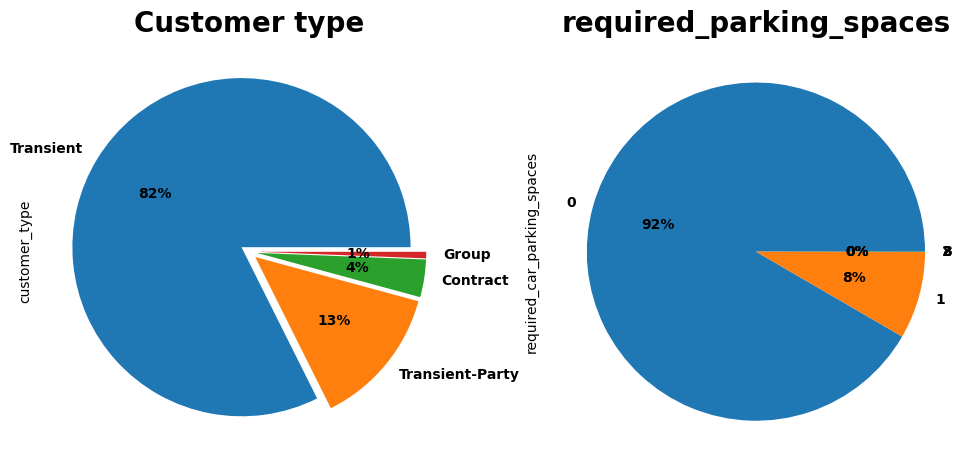

In [ ]:
Hotel_df.customer_type.nunique()
Customer_typ =Hotel_df.customer_type .value_counts()
plt.figure(figsize =(12,12))
plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4)
plt.title('Customer type',fontweight="bold", size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(1,2,2)
Car_parking_spaces = Hotel_df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20)

1-->There are 4 types of Customer. Out of them most are 'Transient Type"

2-->only 8% people require parking spaces

# Hotel Wise Bookings based on Date Month and year

In [ ]:
City_df.arrival_date_month.value_counts()

August       6576
July         5730
May          5402
April        5072
June         4997
March        4832
September    4232
October      4197
February     3591
December     2998
November     2922
January      2724
Name: arrival_date_month, dtype: int64

In [ ]:
Resort_df.arrival_date_month.value_counts()

August       4666
July         4313
May          2942
April        2828
June         2759
October      2724
March        2656
February     2492
September    2450
December     2114
November     2051
January      1961
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, ' bookings by year')

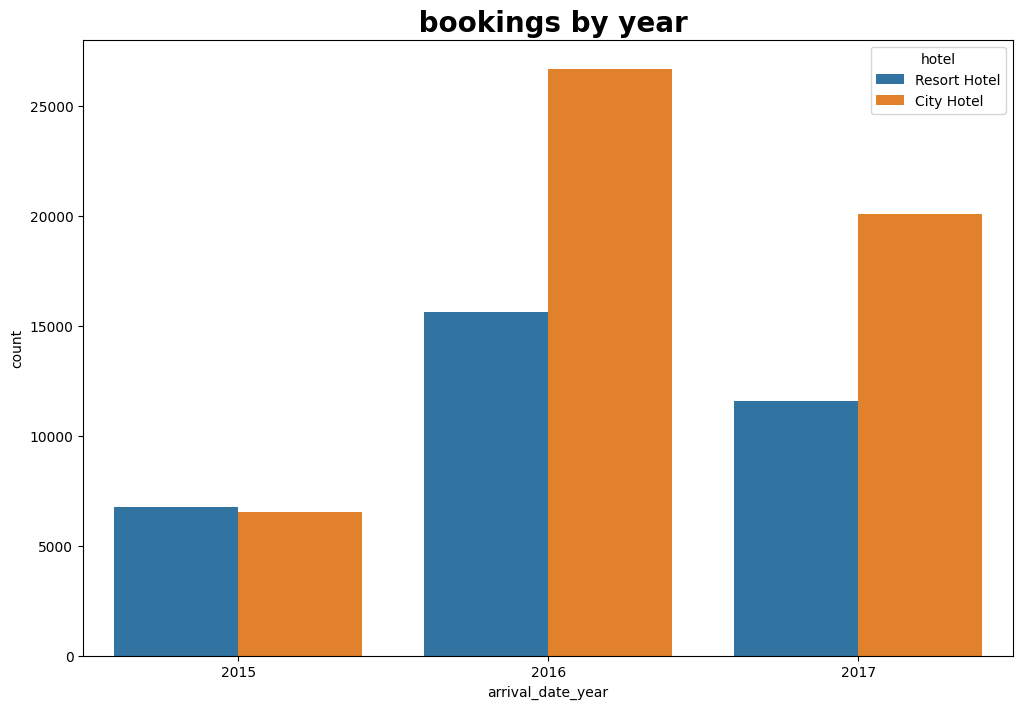

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Hotel_df['arrival_date_month'] = pd.Categorical(Hotel_df['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize = (12,8))
sns.countplot(x= 'arrival_date_year', data= Hotel_df, hue= 'hotel').set_title (' bookings by year',fontweight="bold", size=20)


1-->Bookings for city hotels are higher than resort hotels over the years and  in year 2016 the bookings for both the hotels were maximum.

2-->Most bookings were done in the month of May,June, July, August.


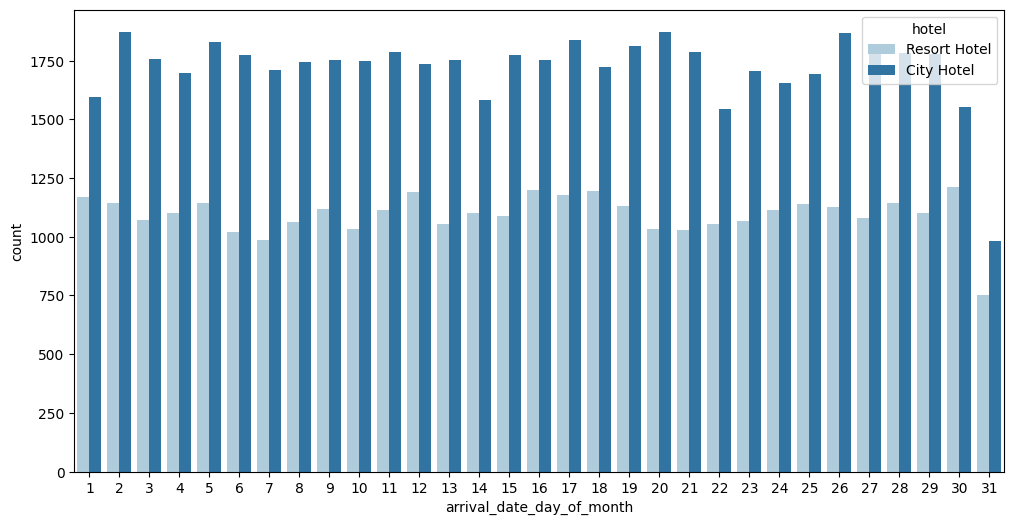

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = Hotel_df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

we can see less no. of arrivals are at the month end.  

Text(0, 0.5, 'Number of guest')

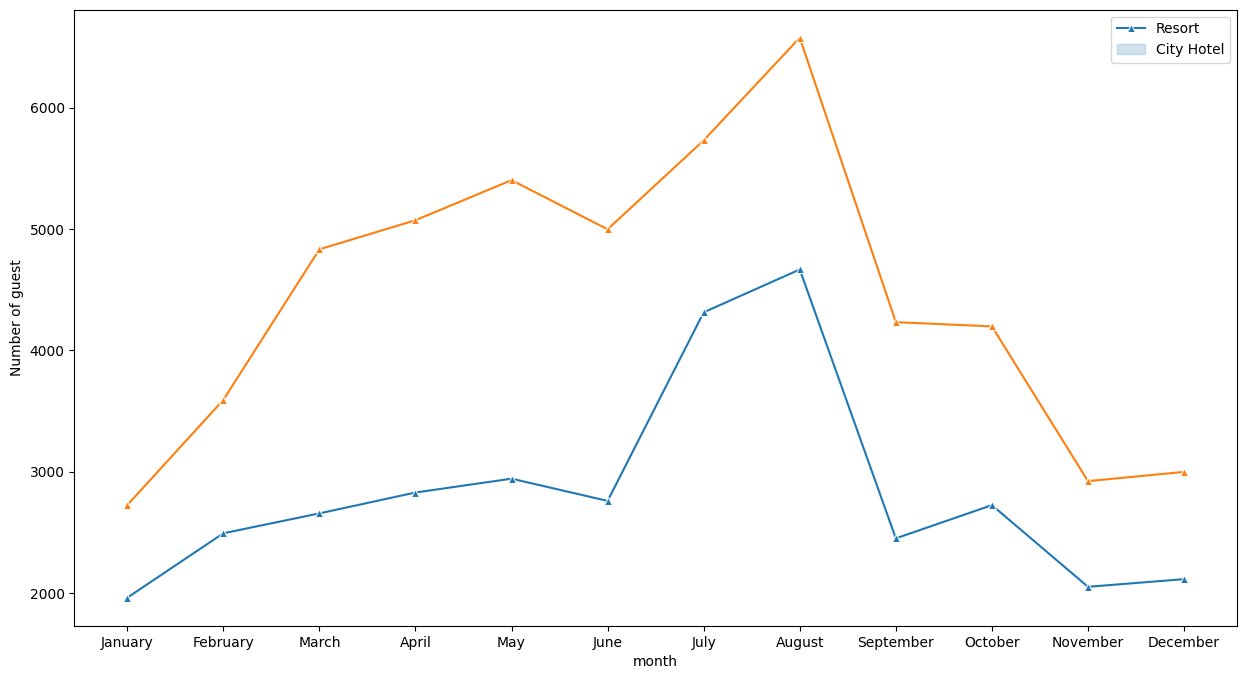

In [ ]:
resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = City_df['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')                              #merge resort guest and city guest month wise
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)

#Which month get most visitors?
plt.figure(figsize =(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort', marker ='^')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel',marker ='^')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')

As we have seen above the busiest months for both the hotels are May,june ,july,August.

# From Where the most guests are coming ?????

Text(0.5, 1.0, 'Number of bookings country wise')

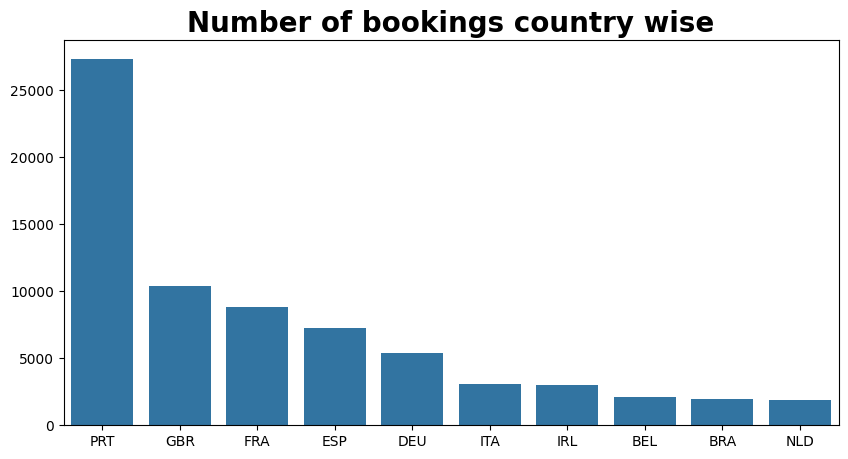

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot (y= list(Hotel_df.country.value_counts().head (10)), x= list(Hotel_df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)

#list(Hotel_df.country.value_counts().head (10))-->[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104]
#list(Hotel_df.country.value_counts().head(10).index)-->['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

Most guest are from Portugal and other Europian contries.

#Adults and kids

In [ ]:
City_df['kids'].value_counts()

0     48039
1      3128
2      2023
3        81
10        1
9         1
Name: kids, dtype: int64

In [ ]:
Resort_df['kids'].value_counts()

0     30087
1      2149
2      1690
3        29
10        1
Name: kids, dtype: int64

In [ ]:
Hotel_df['adults'].value_counts()

2     64496
1     16503
3      5935
0       219
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

<ipython-input-46-dcc1c90ebb80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_members', data=Hotel_df, palette='husl', legend=False)


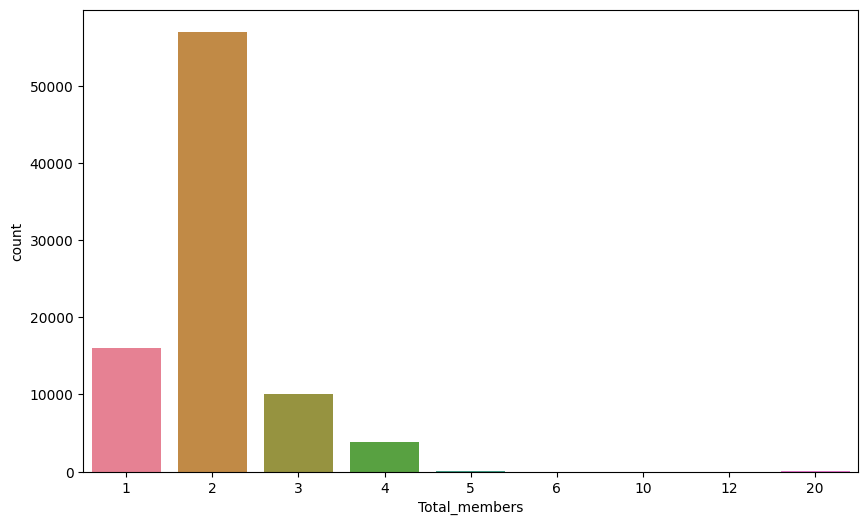

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20   # Removing outliers from Total_members column
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_members', data=Hotel_df, palette='husl', legend=False)
plt.show()



Most guests prefer to come as pair of 2 Adults.

# Which agent made the maximum bookings?

Text(0.5, 1.0, 'No. of bookings done by agents')

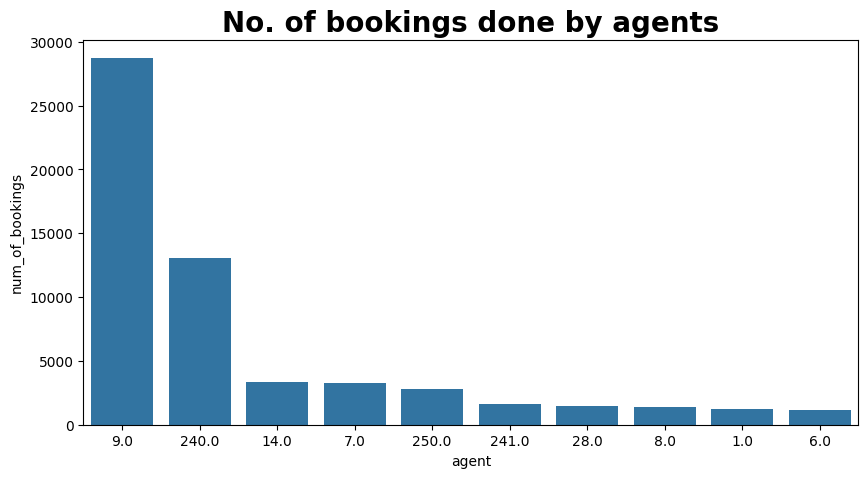

In [ ]:
agent_df = pd.DataFrame(Hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agent_df.drop(agent_df[agent_df['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
agent_df = agent_df[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agent_df, order = agent_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'No. of bookings done by agents',fontweight="bold", size=20)

Agent no. 9 has made most no. of bookings.

# Most preferred Room type

<Axes: xlabel='assigned_room_type', ylabel='Average_daily_rate'>

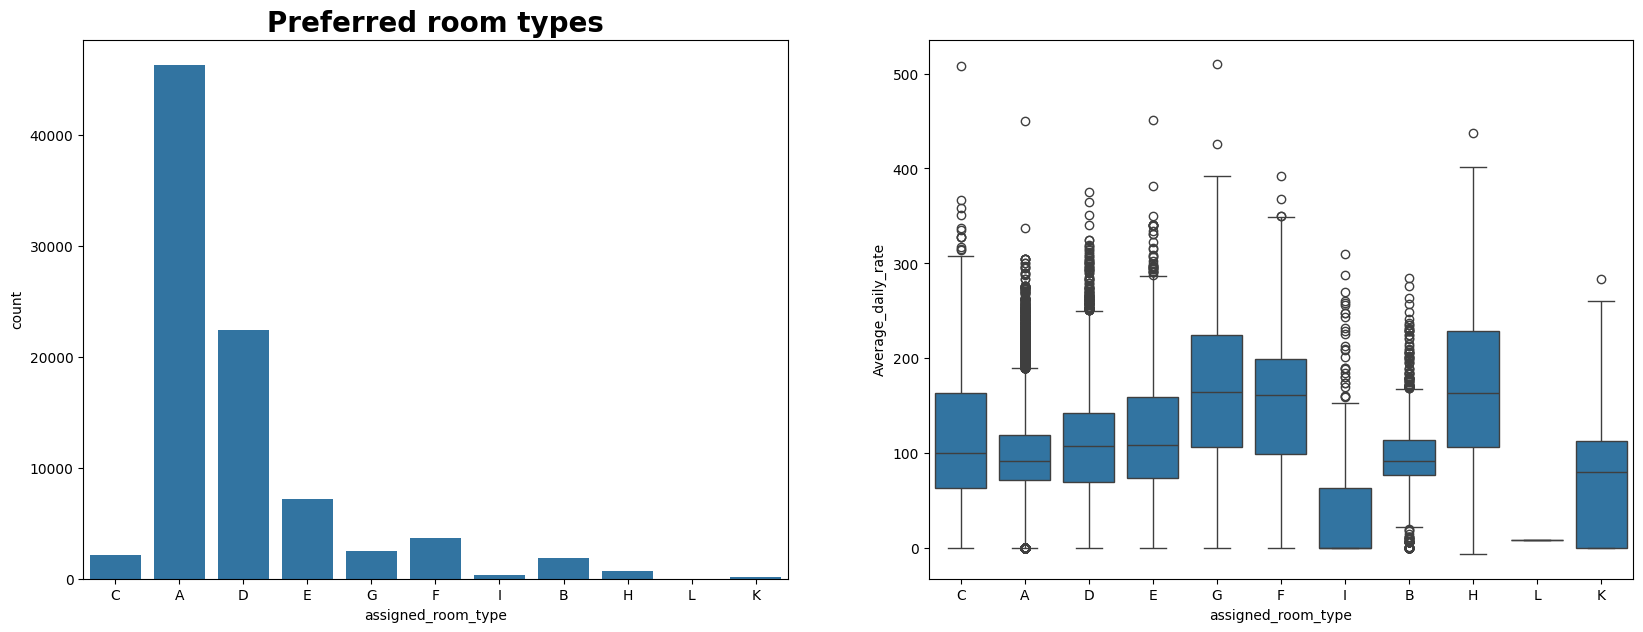

In [ ]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot( x = Hotel_df['assigned_room_type'])
plt.title('Preferred room types',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.boxplot(x = Hotel_df['assigned_room_type'], y = Hotel_df['Average_daily_rate'])

Room type A and D are most preferred by guests.

but better 'Average daily rate' rooms are of type H,G,F and C.

# Stay_length in hotels

Text(0.5, 1.0, 'Stay length in hotels')

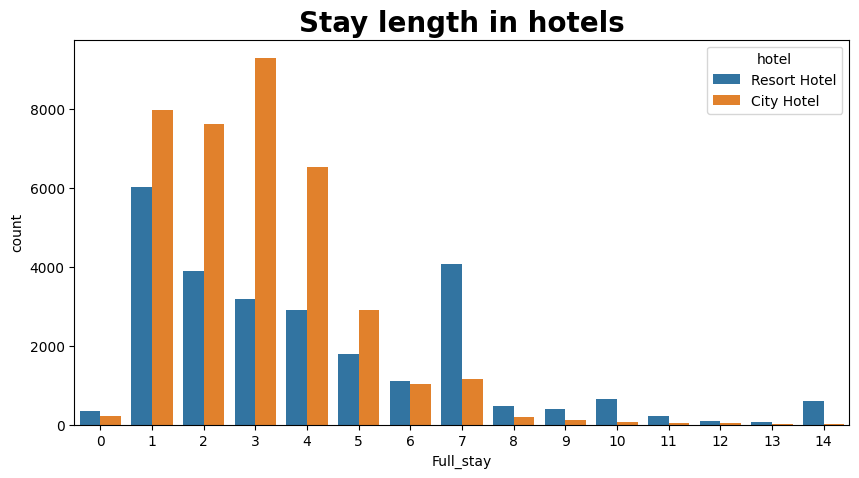

In [ ]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]         #limiting full stay to less than 15
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontweight="bold", size=20)

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Text(0.5, 1.0, 'Number of stays on weekday nights')

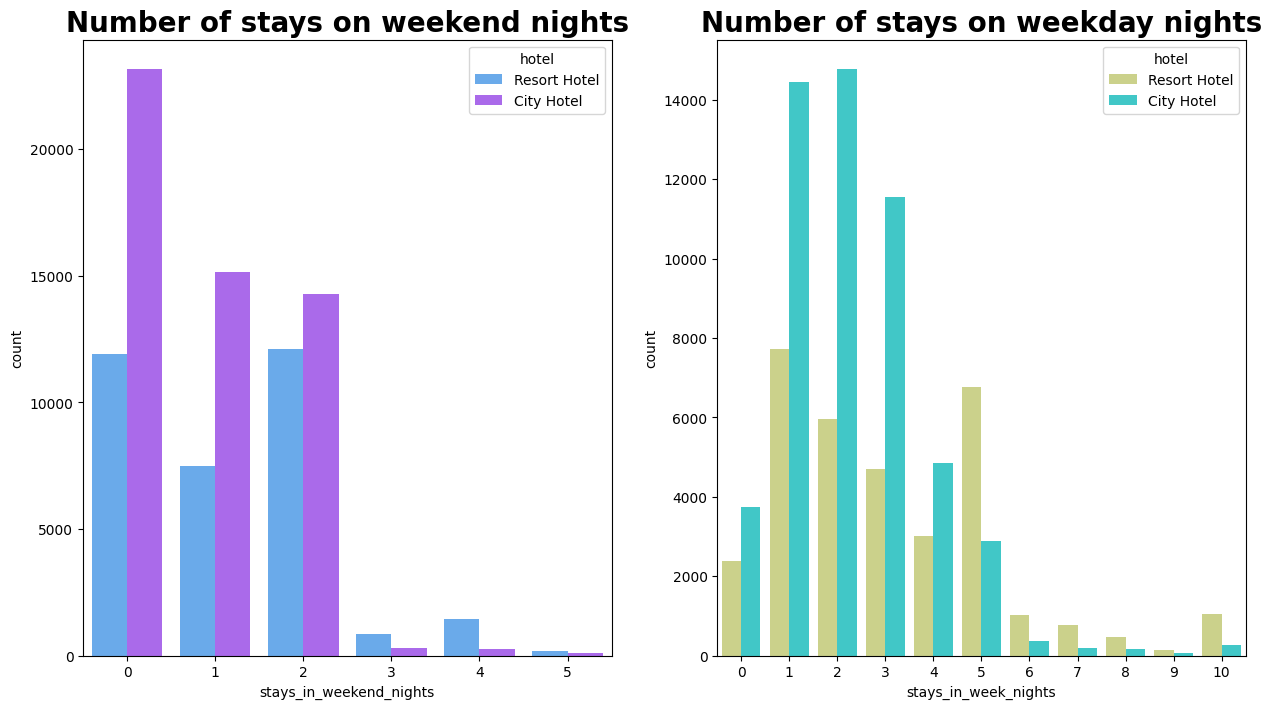

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=Hotel_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=Hotel_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

city hotels have more number of stays irrespective of week or weekend stays.

<Axes: xlabel='Full_stay', ylabel='Average_daily_rate'>

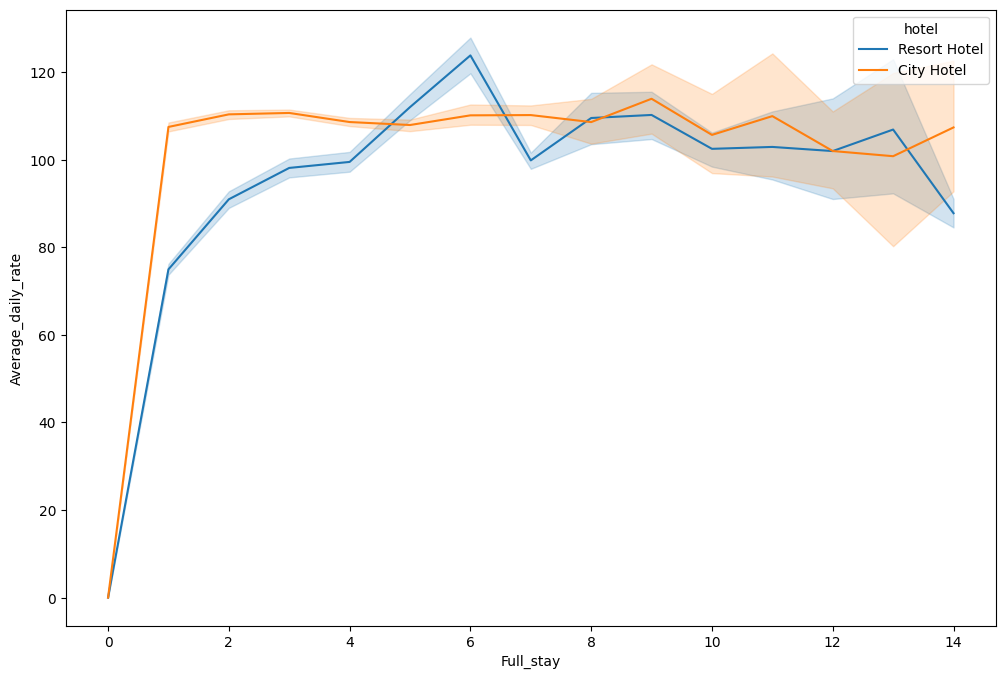

In [ ]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]        #taking less than 15 days of Full stay
plt.figure(figsize =(12,8))
sns.lineplot(data = Hotel_df, x = s1['Full_stay'], y = 'Average_daily_rate', hue = 'hotel')


After 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel you should plan a stay of 6-7 days.
For city hotels is almost constant. And Average_daily_rate goes down after 14 days(long stay).

# Cancellation rates

Text(0.5, 1.0, 'Booking preferred with deposite type')

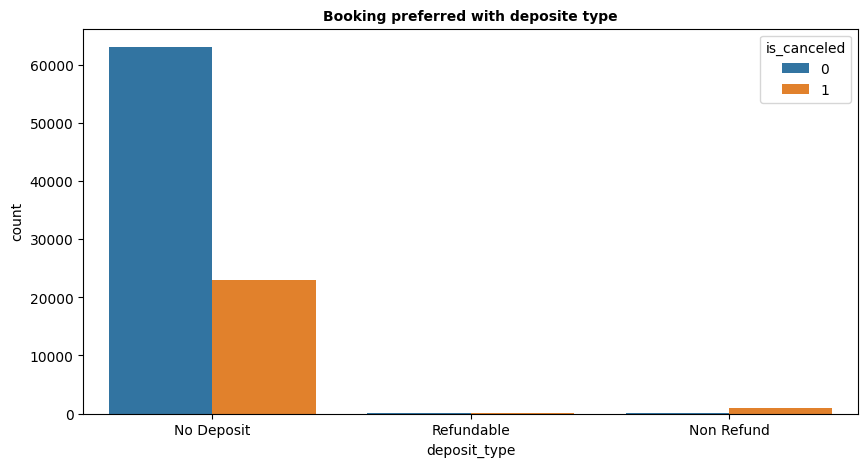

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontweight ="bold",size =10)

As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings

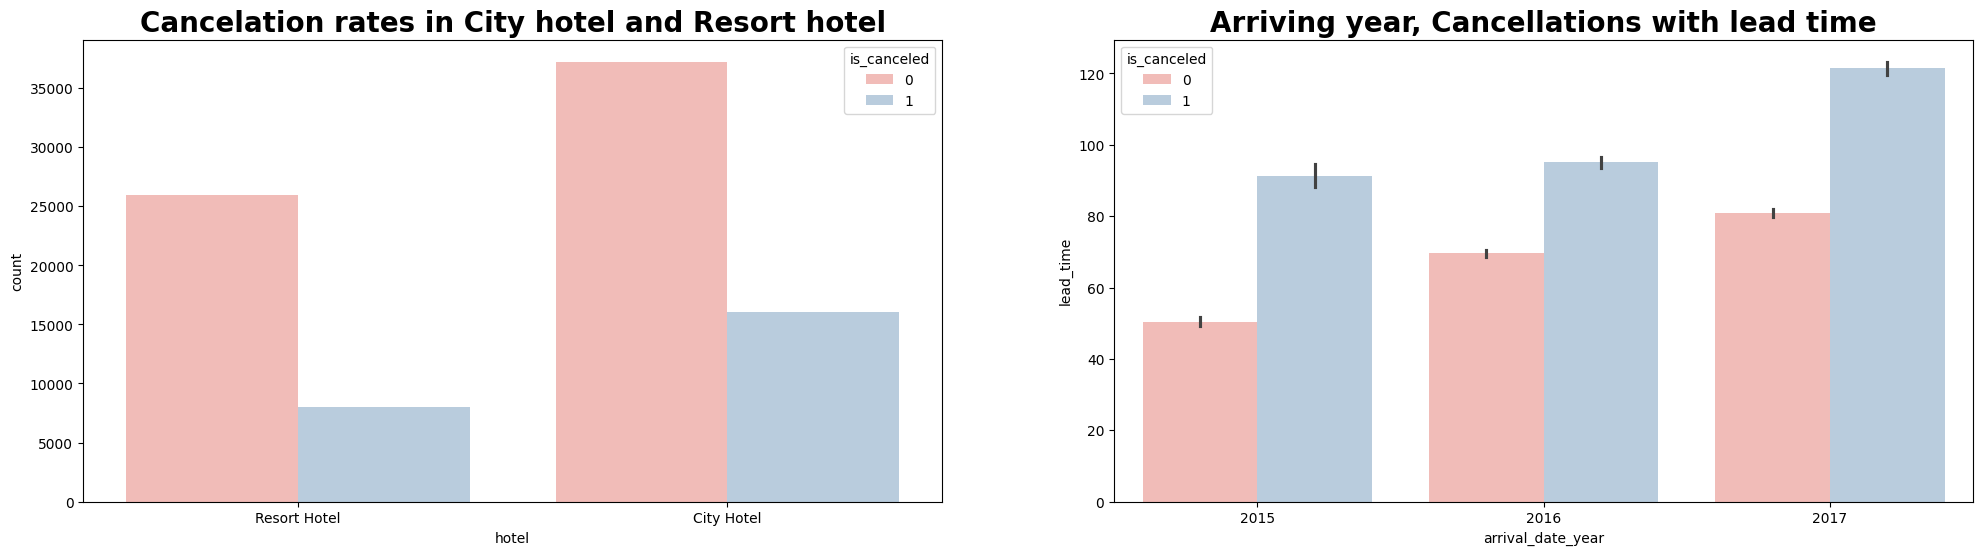

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

Cancelation rate is higher in city hotel. With more lead time there is more possibility of booking cancellation.

# Waiting time

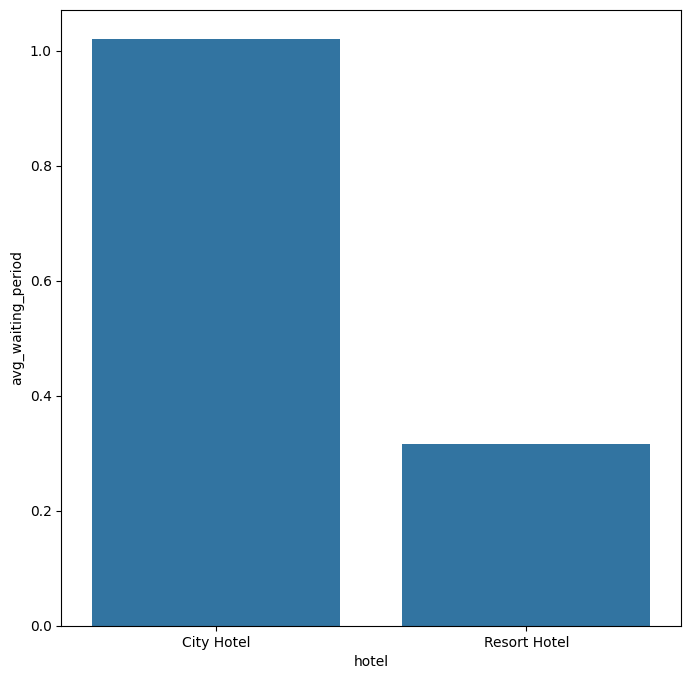

In [ ]:
grouped_by_hotel = Hotel_df.groupby('hotel') #creating a DF which store groupby 'Hotel' rows
# waiting_df which stores mean of days in waiting list column
Waiting_df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,8))
sns.barplot(x = Waiting_df['hotel'], y = Waiting_df['avg_waiting_period'] )
plt.show()


City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

# Average_daily_rate and price

Text(0.5, 1.0, 'Average daily rate month wise')

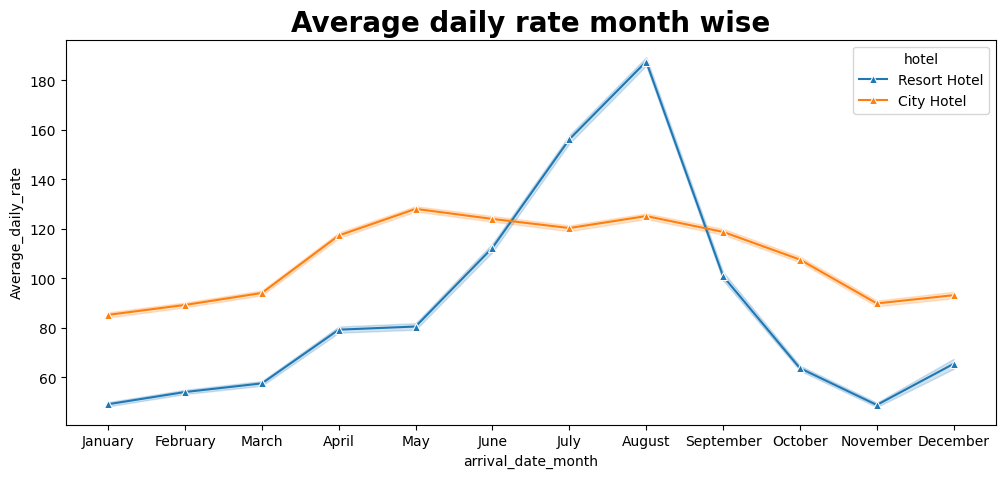

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_df, x = 'arrival_date_month', y = 'Average_daily_rate', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

<ipython-input-56-af5b4cbc1675>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Full_stay'])


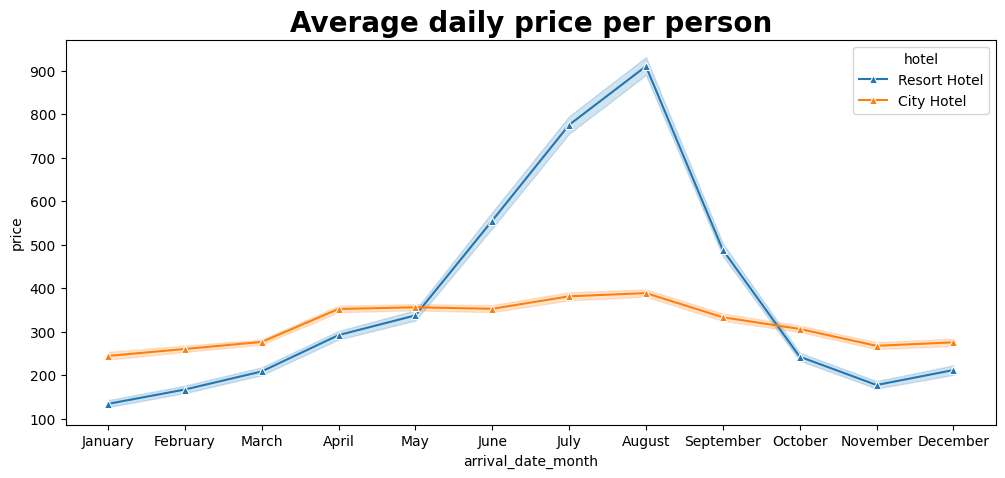

In [ ]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
Hotel_df['Average_Daily_rate_pp'] = Hotel_df['Average_daily_rate'] / (Hotel_df['adults'] + Hotel_df['children'])
Actual_guests = Hotel_df.loc[Hotel_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Full_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', marker ='^')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

Prices of resort hotel are much higher during May,June,July,August,September

Prices of city hotel do not fluctuate that much.

# Special Requests

In [ ]:
Hotel_df['total_of_special_requests'].value_counts()

0    43788
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

Text(0.5, 0, 'No. of special requests')

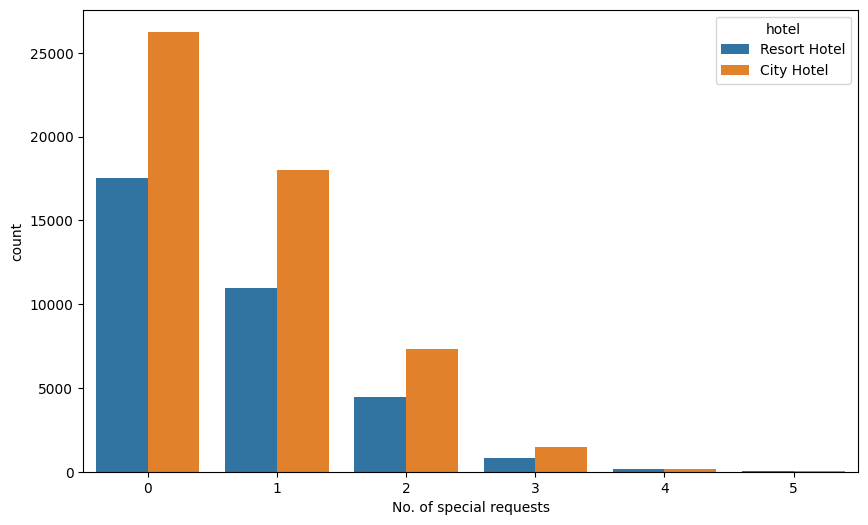

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(data =Hotel_df,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests')

City hotels have more no. of special requests. Most of them ask for only 1 special request.

In [ ]:
Hotel_df.Total_members.sum()

176868

176868 total members have been registered in the hotels

In [ ]:
Hotel_df.required_car_parking_spaces.sum()

7354

7354 car Parking spaces have been used

# Conclusion:

The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.

Around 61% bookings are for City hotel and 39% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel.

Majority of the hotels booked are city hotel. Definitely need to spend the most
targeting fund on those hotel.

We should also target months between May to Aug. Those are peak months due to the summer period.

Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

80% distribution_channel is TA/TO

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

November,Descember, February And January are the months which has less booking so in this perios you can get rooms with less average daily rate. And Avoid most busiest months for hotels (May,June,July,August)
